# EDA
## Vivienda en Madrid

In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('houses_Madrid.csv', index_col='Unnamed: 0')
data = data.sort_index(axis= 1)

Eliminación de las columnas que son nulas o no aportan información relevante al análisis

In [3]:
data.columns

Index(['are_pets_allowed', 'built_year', 'buy_price', 'buy_price_by_area',
       'door', 'energy_certificate', 'floor', 'has_ac', 'has_balcony',
       'has_central_heating', 'has_fitted_wardrobes', 'has_garden',
       'has_green_zones', 'has_individual_heating', 'has_lift', 'has_parking',
       'has_pool', 'has_private_parking', 'has_public_parking',
       'has_storage_room', 'has_terrace', 'house_type_id', 'id',
       'is_accessible', 'is_buy_price_known', 'is_exact_address_hidden',
       'is_exterior', 'is_floor_under', 'is_furnished', 'is_kitchen_equipped',
       'is_new_development', 'is_orientation_east', 'is_orientation_north',
       'is_orientation_south', 'is_orientation_west',
       'is_parking_included_in_price', 'is_renewal_needed',
       'is_rent_price_known', 'latitude', 'longitude', 'n_bathrooms',
       'n_floors', 'n_rooms', 'neighborhood_id', 'operation', 'parking_price',
       'portal', 'raw_address', 'rent_price', 'rent_price_by_area',
       'sq_mt_allot

In [4]:
def nombre_columnas(df):
    '''Función para tratar el nombre de las columnas y eliminar las vacias'''
    try:
        df.drop(columns=['latitude', 'longitude', 'portal', 'door', 'rent_price_by_area', 'are_pets_allowed', 'is_furnished',
                    'is_kitchen_equipped', 'has_private_parking', 'has_public_parking', 'sq_mt_useful', 'n_floors', 'has_ac', 'title',
                    'sq_mt_allotment', 'raw_address', 'is_exact_address_hidden', 'street_name', 'street_number', 'is_buy_price_known',
                    'is_parking_included_in_price', 'is_rent_price_known', 'operation', 'is_new_development', 'parking_price', 'rent_price', 'id', 'neighborhood_id',
                    'has_central_heating', 'has_individual_heating', 'has_lift', 'is_orientation_east', 'is_orientation_north', 'is_orientation_south', 'is_orientation_west'
                    ], axis=1, inplace = True)
        
        df.columns = ['annio_construccion', 'precio_venta', 'precio_venta_por_m2', 'cee',
       'piso', 'balcon', 'armarios_empotrados', 'jardin', 'zonas_verdes', 
       'estacionamiento', 'pileta',
       'trastero', 'terraza', 'tipo_inmueble',
       'accesible', 'exterior', 'bajo', 'necesita_reforma', 'bannos', 'habitaciones',
        'metros_cuadrados', 'ubicacion']

    except Exception as a:
        print(f"No pude tranformar las columnas por {a}")
    return df

In [5]:
df = nombre_columnas(data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 21741
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annio_construccion   10000 non-null  float64
 1   precio_venta         21742 non-null  int64  
 2   precio_venta_por_m2  21742 non-null  int64  
 3   cee                  21742 non-null  object 
 4   piso                 19135 non-null  object 
 5   balcon               3321 non-null   object 
 6   armarios_empotrados  13399 non-null  object 
 7   jardin               1556 non-null   object 
 8   zonas_verdes         4057 non-null   object 
 9   estacionamiento      21742 non-null  bool   
 10  pileta               5171 non-null   object 
 11  trastero             7698 non-null   object 
 12  terraza              9548 non-null   object 
 13  tipo_inmueble        21351 non-null  object 
 14  accesible            4074 non-null   object 
 15  exterior             18699 non-null  obje

In [7]:
df.describe(include = 'all').round()

,annio_construccion,precio_venta,precio_venta_por_m2,cee,piso,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,metros_cuadrados,ubicacion
count,10000.0,21742.0,21742.0,21742,19135,3321,13399,1556,4057,21742,5171,7698,9548,21351,4074,18699,20572,21742,21726.0,21742.0,21616.0,21742
unique,NaN,NaN,NaN,10,19,1,1,1,1,2,1,1,1,4,1,2,2,2,NaN,NaN,NaN,146
top,NaN,NaN,NaN,en trámite,1,True,True,True,True,False,True,True,True,HouseType 1: Pisos,True,True,False,False,NaN,NaN,NaN,"Chamartín, Madrid"
freq,NaN,NaN,NaN,10937,4440,3321,13399,1556,4057,14023,5171,7698,9548,17705,4074,16922,18033,17747,NaN,NaN,NaN,851
mean,1970.0,653736.0,4021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,147.0,NaN
std,69.0,782082.0,1908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,134.0,NaN
min,1723.0,36000.0,447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,13.0,NaN
25%,1957.0,198000.0,2551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,70.0,NaN
50%,1970.0,375000.0,3720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,100.0,NaN
75%,1994.0,763600.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,162.0,NaN


In [8]:
df_cardin = pd.DataFrame([{
    'variable' : i,
    'tipo_dato' : df[i].dtypes,
    'cantidad_de_nulos' : df[i].isna().sum(),
    'valores_unicos' : df[i].unique(),
    'cardinalidad' : df[i].nunique(),
    'porcentaje_cardinalidad' : (df[i].nunique()/df.shape[0])*100
} for i in df])

In [9]:
df_tipo_variable = pd.DataFrame({'tipo_variable' : ['discreta', 'continua', 'continua', 'ordinal',
       'ordinal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'discreta',
       'discreta', 'continua', 'nominal']})

In [10]:
df_cardinalidad = pd.concat([df_cardin,df_tipo_variable], axis = 1)

In [11]:
df_cardinalidad

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad,tipo_variable
0,annio_construccion,float64,11742,"[1960.0, nan, 1955.0, 2003.0, 1981.0, 1950.0, ...",155,0.712906,discreta
1,precio_venta,int64,0,"[85000, 129900, 144247, 109900, 260000, 195000...",2403,11.052341,continua
2,precio_venta_por_m2,int64,0,"[1328, 1856, 1535, 1717, 2407, 1548, 1583, 158...",5643,25.954374,continua
3,cee,object,0,"[D, en trámite, no indicado, F, E, inmueble ex...",10,0.045994,ordinal
4,piso,object,2607,"[3, 4, 1, Bajo, 2, nan, 7, 6, Semi-sótano, 5, ...",19,0.087388,ordinal
5,balcon,object,18421,"[nan, True]",1,0.004599,nominal
6,armarios_empotrados,object,8343,"[nan, True]",1,0.004599,nominal
7,jardin,object,20186,"[nan, True]",1,0.004599,nominal
8,zonas_verdes,object,17685,"[nan, True]",1,0.004599,nominal
9,estacionamiento,bool,0,"[False, True]",2,0.009199,nominal


## Analisis Univariante

In [12]:
# COLORES
color_g = '#E67E22'
media_color = 'r'
mediana_color = 'b'

##### Variables Cuantitativas

In [13]:
df_cuant = df.select_dtypes(include = 'number')
df_cuant.describe().round()

,annio_construccion,precio_venta,precio_venta_por_m2,bannos,habitaciones,metros_cuadrados
count,10000.0,21742.0,21742.0,21726.0,21742.0,21616.0
mean,1970.0,653736.0,4021.0,2.0,3.0,147.0
std,69.0,782082.0,1908.0,1.0,2.0,134.0
min,1723.0,36000.0,447.0,1.0,0.0,13.0
25%,1957.0,198000.0,2551.0,1.0,2.0,70.0
50%,1970.0,375000.0,3720.0,2.0,3.0,100.0
75%,1994.0,763600.0,5000.0,2.0,4.0,162.0
max,8170.0,8800000.0,18889.0,16.0,24.0,999.0


In [14]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    try:
        for columna in data.columns:
            print('--'*30)
            print(f"VARIABLE: {columna}\n")

            media = data[columna].mean()
            mediana = data[columna].median()

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h', palette='husl')
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1)
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1)

            plt.show()

            sns.displot(data[columna], rug = True, palette='husl' , bins = 30)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1, label = f'Media: {media:.0f}')
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1, label = f'Mediana: {mediana:.0f}')

            plt.title(f'Distribución de {columna}')
            plt.legend()

            plt.show()

            print(data[columna].describe().round())
            print('--'*30)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

In [15]:
graficos_variables_cuant(df_cuant)

------------------------------------------------------------
VARIABLE: annio_construccion

No puedo analizar la variable por este error name 'plt' is not defined


##### Variables Cualitativas

In [16]:
df_cual = df.select_dtypes(exclude= 'number')

In [17]:
def graficos_variables_cualit(data):
    ''''Funcuion para graficar las variables cualitativas'''
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")
            if len(df[columna].dropna().unique()) > 1:
                ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
                ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)
                #se superponen los valores porque me da uns advertencia al aplicar este parametro, no sé como sacarla :)
                plt.title(f"Conteo variable {columna}")
                plt.show();
            else:
                print('No es necesario graficar porque tiene un solo valor dentro de la columna')
            print(data[columna].value_counts())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

In [18]:
graficos_variables_cualit(df_cual)

----------------------------------------------------------------------------------------------------
VARIABLE: cee

No puedo analizar la variable por este error name 'sns' is not defined


## Limpieza de datos

In [11]:
def rellenar_columnas_F(data):
    ''' Función que rellena las columnas que tienen valor true y nan'''
    try:
        df['zonas_verdes'].replace(np.nan, False,inplace=True)
        df['balcon'].replace(np.nan, False,inplace=True)
        df['armarios_empotrados'].replace(np.nan, False,inplace=True)
        df['jardin'].replace(np.nan, False,inplace=True)
        df['pileta'].replace(np.nan, False,inplace=True)
        df['trastero'].replace(np.nan, False,inplace=True)
        df['terraza'].replace(np.nan, False,inplace=True)
        df['accesible'].replace(np.nan, False,inplace=True)
    except Exception as a:
        print(f"No pude rellenar las columnas por {a}")
    return data

In [12]:
df = rellenar_columnas_F(df)

In [13]:
def rellenar_annios_nulos_necesitan_reforma(df):
    '''Función para rellenar los annios que vienen nulos'''
    try:
        #diccionario para ver si tenemos todos las ubicaciones o no
        dicc_annios_antiguos = df[(df['necesita_reforma'] == True) & (df['annio_construccion'].notna())].groupby('ubicacion')[['annio_construccion']].mean(numeric_only = True).astype(int).reset_index().to_dict('records')
        
        #agrega las ubicaciones que no existen, asignando la media de los inmuebles que necesitan reforma
        dicc_annios_antiguos = dicc_annios_antiguos + [{'ubicacion': 'Horcajo, Madrid', 'annio_construccion': 1957}, 
                   {'ubicacion': 'Valdebebas - Valdefuentes, Madrid', 'annio_construccion': 1957},
                   {'ubicacion': 'Virgen del Cortijo - Manoteras, Madrid', 'annio_construccion': 1957}]
        
        df_annios_antiguos = pd.DataFrame(dicc_annios_antiguos)
        df_unido = pd.merge(df,df_annios_antiguos, on='ubicacion', how = 'left')

        #asigna el valor de el annio en base a la la ubicacion
        df_unido['annio_construccion'] = df_unido.apply(lambda x: x.annio_construccion_y if ((x.necesita_reforma == True) & (pd.isna(x.annio_construccion_x))) else x.annio_construccion_x, axis = 1)

        df = df_unido.drop(columns=['annio_construccion_y', 'annio_construccion_x'], axis = 1)
    
    except Exception as a:
        print(f"No pude transformar el df por {a}")

    return df


In [14]:
def rellenar_annios_nulos_no_necesitan_reforma(df):
    '''Función para rellenar los annios que vienen nulos'''
    try:
        #diccionario para ver si tenemos todos las ubicaciones o no
        dicc_annios_nuevo = df[(df['necesita_reforma'] == False) & (df['annio_construccion'].notna())].groupby('ubicacion')[['annio_construccion']].mean(numeric_only = True).astype(int).reset_index().to_dict('records')
        
        #agrega las ubicaciones que no existen, asignando la media de los inmuebles que no necesitan reforma
        dicc_annios_nuevo = dicc_annios_nuevo + [{'ubicacion': 'Cuatro Vientos, Madrid', 'annio_construccion': 1973}]
        
        df_annios_nuevo = pd.DataFrame(dicc_annios_nuevo)
        df_unido_nuevo = pd.merge(df,df_annios_nuevo, on='ubicacion', how='left')

        #asigna el valor de el annio en base a la la ubicacion
        df_unido_nuevo['annio_construccion'] = df_unido_nuevo.apply(lambda x: x.annio_construccion_y if ((x.necesita_reforma == False) & (pd.isna(x.annio_construccion_x))) else x.annio_construccion_x, axis = 1)

        df = df_unido_nuevo.drop(columns=['annio_construccion_x', 'annio_construccion_y'], axis = 1)
    
    except Exception as a:
        print(f"No pude transformar el df por {a}")

    return df

In [15]:
media_año_barrio_s = df[(df['ubicacion'] == 'Barrio de Salamanca, Madrid') & (df['annio_construccion'].notna())].groupby('ubicacion')['annio_construccion'].mean(numeric_only = True).astype(int)
media_año_barrio_s

ubicacion
Barrio de Salamanca, Madrid    1979
Name: annio_construccion, dtype: int32

In [16]:
df['annio_construccion'].replace(8170.0, 1979, inplace= True)

In [17]:
def rellenar_pisos_nulos(df):
    '''Funcion para rellenar los valores nulos de los pisos, con la moda segun la ubicacion'''
    try:
        #df el piso que más se repite, respetando las alturas por ubicacion segun normativa
        df_piso_más_comun = df[df['piso'].notna()].groupby(['ubicacion', 'piso'], as_index=False).count()[['ubicacion', 'piso']].groupby('ubicacion', as_index=False).max()

        df_unido_pisos = pd.merge(df,df_piso_más_comun, on='ubicacion', how= 'inner')

        df_unido_pisos['piso'] = df_unido_pisos.apply(lambda x: x.piso_y if pd.isna(x.piso_x) else x.piso_x, axis = 1)

        df = df_unido_pisos.drop(columns=['piso_x', 'piso_y'], axis = 1)
    except Exception as a:
        print(f"No pude transformar el df por {a}")
    return df

In [18]:
def rellenar_bajos_nulos(data):
    '''Funcion que rellena los valores nulos en la columna bajo en base al piso en el que se encuentra'''
    try:
        bajos = ('Semi-sótano', 'Entreplanta interior', 'Entreplanta', 'Semi-sótano exterior', 'Semi-sótano interior', 'Sótano interior', 'Sótano', 'Sótano exterior')

        data['bajo'] = data['piso'].apply(lambda x: True if x in bajos else False)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return data

In [19]:
def sacar_metros_cuadrados_nuevos(data):
    ''''Funcion para rellenar los valores nulos de los metros cuadrados en base a el precio por metro cuadrado'''
    try:
        data.drop(columns=['metros_cuadrados'], axis= 1, inplace=True)
        data['metros_cuadrados'] = (data['precio_compra'] / data['precio_compra_por_m2']).round()
    except Exception as a:
        print(f"No pude tranformar el dataframe")
    return data
    

In [20]:
def rellenar_exterior(data):
    '''Funcion que rellena los valores nulos en la columna exterior en base a el piso en el que se encuentra'''
    try:
        exteriores = ('Entreplanta exterior', 'Semi-sótano exterior', 'Sótano exterior')

        data['exterior'] = data['piso'].apply(lambda x: True if x in exteriores else False)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return data

In [21]:
def rellenar_tipo_inmueble(data):
    '''Funcion que rellena los valores nulos en la columna tipo_inmueble, los unico no completos son los estudios'''
    try:
        data['tipo_inmueble'].fillna(value ='HouseType 1: Pisos', inplace=True)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return data

In [22]:
def rellenar_bannos_nulos(data):
    '''Funcion para rellenar los valores nulos de los bannos, con la media segun los metros cuadrados'''
    try:
        dicc_bannos = data[data['bannos'].notna()].groupby(['metros_cuadrados'], as_index=False)[['bannos']].mean().round().to_dict('records')
        dicc_bannos.append({'metros_cuadrados': 661, 'bannos': 5})

        df_banno_mas_comun = pd.DataFrame(dicc_bannos)

        df_unido_bannos = pd.merge(data,df_banno_mas_comun, on='metros_cuadrados', how= 'inner')

        df_unido_bannos['bannos'] = df_unido_bannos.apply(lambda x: x.bannos_y if pd.isna(x.bannos_x) else x.bannos_x, axis = 1)

        data = df_unido_bannos.drop(columns=['bannos_x', 'bannos_y'], axis = 1)
    except Exception as a:
        print(f"No pude transformar el df por {a}")
    return data

In [23]:
df = rellenar_annios_nulos_necesitan_reforma(df)
df = rellenar_annios_nulos_no_necesitan_reforma(df)

In [24]:
df = rellenar_pisos_nulos(df)

In [25]:
df = rellenar_bajos_nulos(df)

In [26]:
df = sacar_metros_cuadrados_nuevos(df)

No pude tranformar el dataframe


In [27]:
df = rellenar_exterior(df)

In [28]:
df = rellenar_tipo_inmueble(df)

In [29]:
df = rellenar_bannos_nulos(df)

No pude transformar el df por 'metros_cuadrados'


In [30]:
for i in df:
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f} %")

La cardinalidad de la variable precio_venta es 11.05 %
La cardinalidad de la variable precio_venta_por_m2 es 25.95 %
La cardinalidad de la variable cee es 0.05 %
La cardinalidad de la variable balcon es 0.01 %
La cardinalidad de la variable armarios_empotrados es 0.01 %
La cardinalidad de la variable jardin es 0.01 %
La cardinalidad de la variable zonas_verdes es 0.01 %
La cardinalidad de la variable estacionamiento es 0.01 %
La cardinalidad de la variable pileta es 0.01 %
La cardinalidad de la variable trastero es 0.01 %
La cardinalidad de la variable terraza es 0.01 %
La cardinalidad de la variable tipo_inmueble es 0.02 %
La cardinalidad de la variable accesible es 0.01 %
La cardinalidad de la variable exterior es 0.01 %
La cardinalidad de la variable bajo es 0.01 %
La cardinalidad de la variable necesita_reforma es 0.01 %
La cardinalidad de la variable bannos es 0.07 %
La cardinalidad de la variable habitaciones es 0.09 %
La cardinalidad de la variable ubicacion es 0.67 %
La cardina

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio_venta         21742 non-null  int64  
 1   precio_venta_por_m2  21742 non-null  int64  
 2   cee                  21742 non-null  object 
 3   balcon               21742 non-null  bool   
 4   armarios_empotrados  21742 non-null  bool   
 5   jardin               21742 non-null  bool   
 6   zonas_verdes         21742 non-null  bool   
 7   estacionamiento      21742 non-null  bool   
 8   pileta               21742 non-null  bool   
 9   trastero             21742 non-null  bool   
 10  terraza              21742 non-null  bool   
 11  tipo_inmueble        21742 non-null  object 
 12  accesible            21742 non-null  bool   
 13  exterior             21742 non-null  bool   
 14  bajo                 21742 non-null  bool   
 15  necesita_reforma     21742 non-null 

In [33]:
df_correlacion = df.select_dtypes(include= 'number').corr()

In [34]:
df_correlacion

,precio_venta,precio_venta_por_m2,bannos,habitaciones,annio_construccion
precio_venta,1.000000,0.519645,0.772218,0.608893,-0.035410
precio_venta_por_m2,0.519645,1.000000,0.239169,0.031707,-0.312602
bannos,0.772218,0.239169,1.000000,0.729152,0.123138
habitaciones,0.608893,0.031707,0.729152,1.000000,0.047424
annio_construccion,-0.035410,-0.312602,0.123138,0.047424,1.000000


### Analisis Bivariante

In [42]:
from scipy.stats import kurtosis, skew

media = df['precio_venta_por_m2'].mean()
median = df['precio_venta_por_m2'].median()
variance = df['precio_venta_por_m2'].var()
desv_std = df['precio_venta_por_m2'].std()  
kurtosis_valor = kurtosis(df['precio_venta_por_m2'])
simetria_valor = skew(df['precio_venta_por_m2'])

sns.kdeplot(data=df, x='precio_venta_por_m2',fill=True,palette='hls')
# Agregar líneas verticales para las estadísticas
plt.axvline(media, color=media_color, linestyle='dashed', label=f'Media: {media:.2f}')
plt.axvline(median, color= mediana_color, linestyle='dashed', label=f'Median: {median:.2f}')
plt.axvline(desv_std, color='y', linestyle='dashed', label=f'Desv_std: {desv_std:.2f}')

plt.title('Distribución del precio por metros cuadrados')
# plt.xlabel('Popularidad')
# plt.ylabel('Densidad')

plt.legend()

plt.show()
# Interpretación de los valores

print(f"kurtosis: {kurtosis_valor:.2f}")
print(f"simetria: {simetria_valor:.2f}")

if kurtosis_valor > 0:
    print("La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.")
elif kurtosis_valor < 0:
    print("La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.")
else:
    print("La distribución es mesocúrtica, similar a una distribución normal.")

if simetria_valor < 0:
    print("La distribución es asimétrica positiva (sesgo hacia la derecha).")
elif simetria_valor > 0:
    print("La distribución es asimétrica negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica alrededor de su media.")

NameError: name 'sns' is not defined

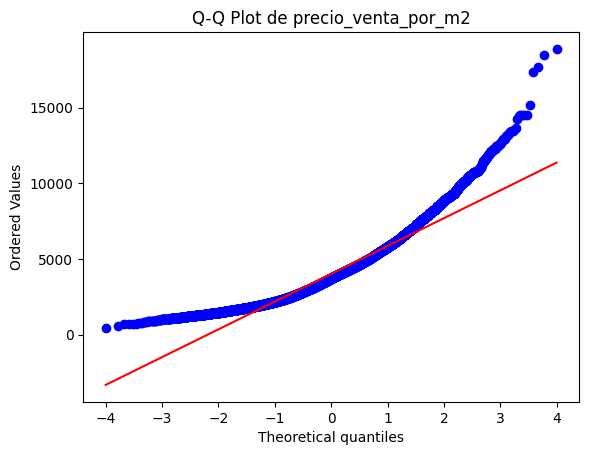

In [ ]:
from scipy.stats import probplot
probplot(df['precio_venta_por_m2'], dist="norm", plot=plt)
plt.title(f'Q-Q Plot de precio_venta_por_m2')
plt.show()

 shapiro para saber si es normal

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['precio_compra_por_m2'])

print("Estadística de prueba:", stat)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Rechazamos la hipótesis nula; los datos no siguen una distribución normal.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula; los datos podrían seguir una distribución normal.")

Estadística de prueba: 0.9275674819946289
Valor p: 0.0
Rechazamos la hipótesis nula; los datos no siguen una distribución normal.


c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:
df_cuant_pair_plot = df.select_dtypes(include = 'number').drop(columns=['annio_construccion'], axis=1)

c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignori

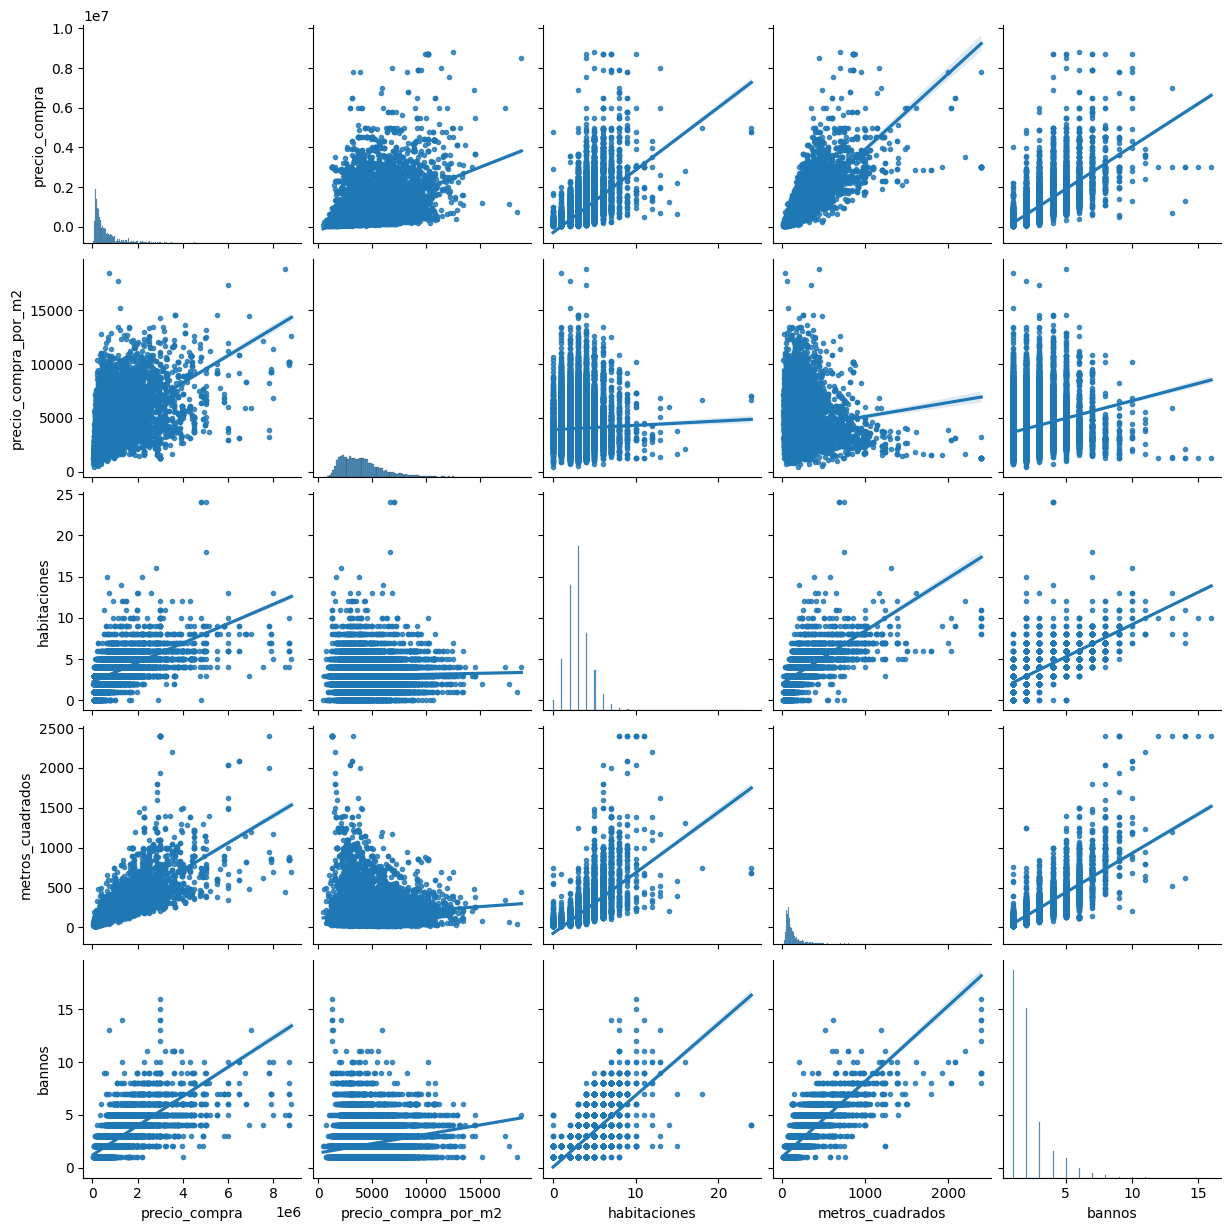

In [ ]:
sns.pairplot(df_cuant_pair_plot, kind='reg', palette='husl', markers='.');

Text(0.5, 1.0, 'Relación entre Precio y Número de Habitaciones')

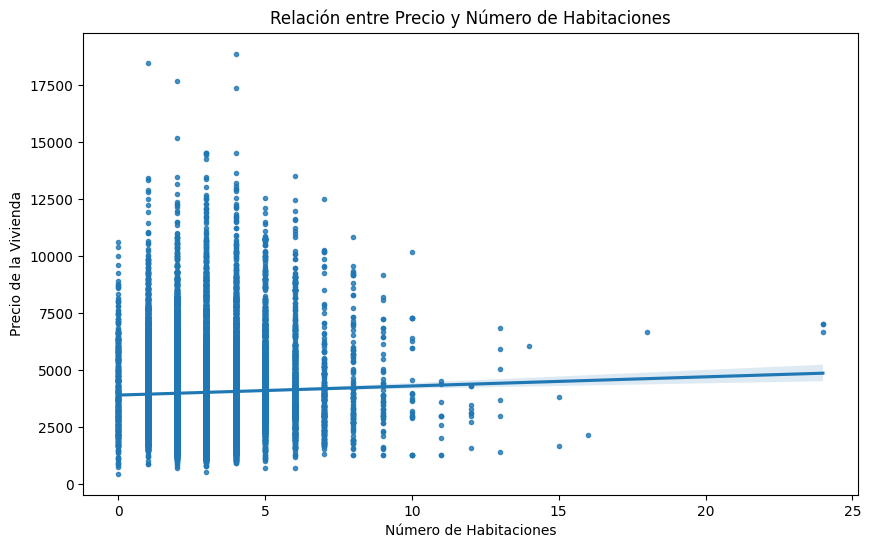

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='habitaciones', y='precio_compra_por_m2', data=df, marker='.')

plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio de la Vivienda')
plt.title('Relación entre Precio y Número de Habitaciones')

In [ ]:
df_precio_compra_cee = df.groupby('cee', as_index=False).mean(numeric_only = True)

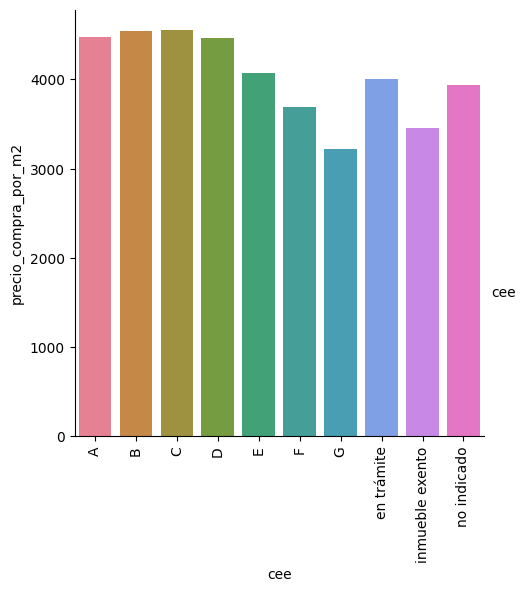

In [ ]:
ax = sns.catplot(x = 'cee', y='precio_compra_por_m2', hue = 'cee', kind= 'bar',
            data=df_precio_compra_cee.sort_values(by='cee'), palette='husl');
ax.set_xticklabels(df_precio_compra_cee['cee'].sort_values().unique(), rotation=90)

In [ ]:
# df_precio_compra_piso = df.groupby('piso', as_index=False, sort=True).mean(numeric_only = True)

In [ ]:
# ax = sns.catplot(x='piso', y = 'precio_compra_por_m2', data = df_precio_compra_piso, kind='bar', hue = 'piso', palette='husl')
# ax.set_xticklabels(df_precio_compra_piso['piso'].sort_values().unique(), rotation=90)
                

# plt.xlabel('Piso')
# plt.title('Relación entre Piso y Precio de Compra por metros cuadrados')

# plt.show()


In [ ]:
df.columns

Index(['annio_construccion', 'precio_venta', 'precio_venta_por_m2', 'cee',
       'piso', 'balcon', 'armarios_empotrados', 'jardin', 'zonas_verdes',
       'estacionamiento', 'pileta', 'trastero', 'terraza', 'tipo_inmueble',
       'accesible', 'exterior', 'bajo', 'necesita_reforma', 'bannos',
       'habitaciones', 'metros_cuadrados', 'ubicacion'],
      dtype='object')

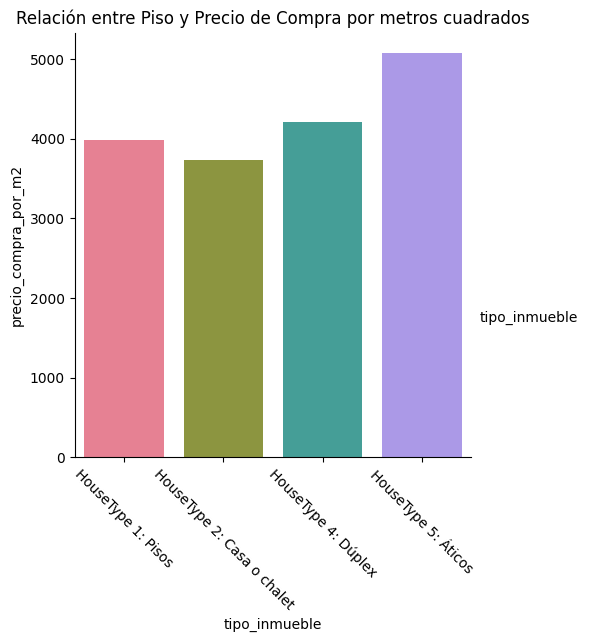

In [ ]:
df_precio_compra_tipo_inmueble = df.groupby('tipo_inmueble', as_index=False, sort=True).mean(numeric_only = True)
ax = sns.catplot(x= 'tipo_inmueble', y = 'precio_venta_por_m2', data = df_precio_compra_tipo_inmueble, kind='bar', hue = 'tipo_inmueble', palette='husl')
ax.set_xticklabels(df_precio_compra_tipo_inmueble['tipo_inmueble'].sort_values().unique(), rotation = -45)
plt.title('Relación entre Piso y Precio de venta por metros cuadrados')


In [ ]:
def grafico_habitaciones(df):
    sns.scatterplot(x= 'habitaciones', y = 'precio_compra_por_m2', data = df, hue = 'estacionamiento', palette='husl')


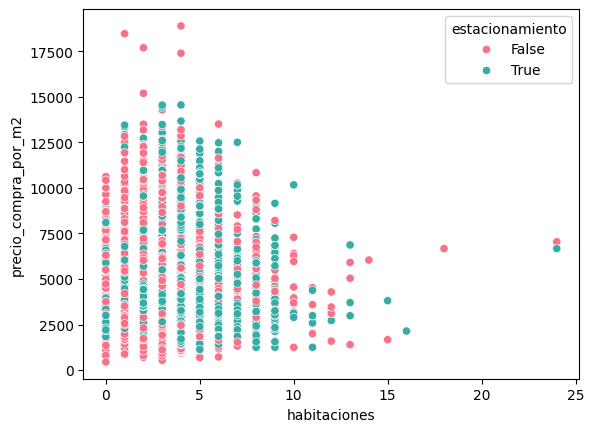

In [ ]:
grafico_habitaciones(df)

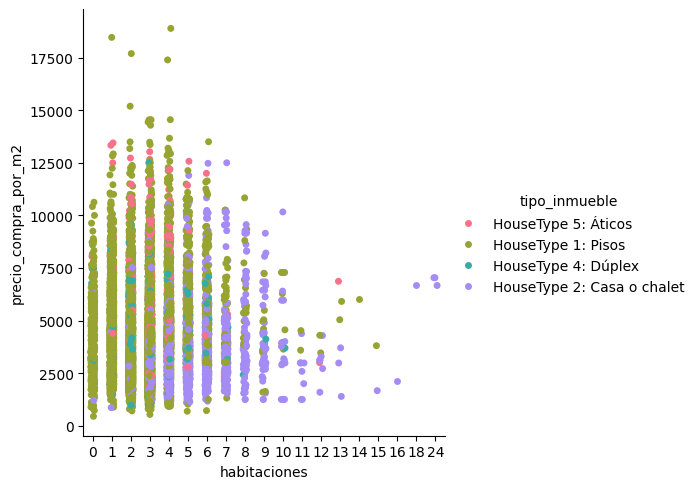

In [ ]:
sns.catplot(x= 'habitaciones', y = 'precio_compra_por_m2', data = df, hue = 'tipo_inmueble', palette='husl')

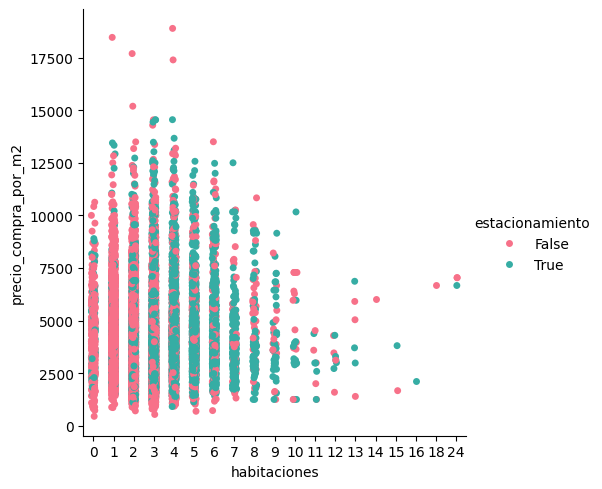

In [ ]:
sns.catplot(x= 'habitaciones', y = 'precio_compra_por_m2', data = df, hue = 'estacionamiento', palette='husl')

## Zonas

In [35]:
sur = ['Usera, Madrid', 'Puente de Vallecas, Madrid', 'Carabanchel, Madrid', 'Villaverde, Madrid', 'Puerta Bonita, Madrid', 'Vista Alegre, Madrid', 'San Fermín, Madrid', 'Pradolongo, Madrid', '12 de Octubre-Orcasur, Madrid', 'Almendrales, Madrid', 'Moscardó, Madrid', 'Zofío, Madrid', 'Los Ángeles, Madrid', 'San Cristóbal, Madrid']
este = ['Vicálvaro, Madrid', 'Casco Histórico de Vallecas, Madrid', 'Ensanche de Vallecas - La Gavia, Madrid', 'Santa Eugenia, Madrid', 'Orcasitas, Madrid', 'San Diego, Madrid', 'Valdebernardo - Valderribas, Madrid', 'Valdezarza, Madrid', 'Barajas, Madrid', 'Arapiles, Madrid', 'San Juan Bautista, Madrid', 'Prosperidad, Madrid', 'Ciudad Lineal, Madrid', 'Costillares, Madrid', 'Pueblo Nuevo, Madrid', 'Quintana, Madrid']
centro = ['Retiro, Madrid', 'Arganzuela, Madrid', 'Chamberí, Madrid', 'Centro, Madrid', 'Malasaña-Universidad, Madrid', 'Palacio, Madrid', 'Sol, Madrid', 'Chueca-Justicia, Madrid', 'Huertas-Cortes, Madrid', 'La Paz, Madrid', 'Recoletos, Madrid', 'Jerónimos, Madrid', 'Atalaya, Madrid', 'Niño Jesús, Madrid', 'Fuentelarreina, Madrid', 'Alameda de Osuna, Madrid', 'Media Legua, Madrid']
oeste = ['Moncloa, Madrid', 'Chamartín, Madrid', 'Tetuán, Madrid', 'Argüelles, Madrid', 'Valdemarín, Madrid', 'Ciudad Universitaria, Madrid', 'Nuevos Ministerios-Ríos Rosas, Madrid', 'Aravaca, Madrid', 'Vallehermoso, Madrid', 'Cuatro Caminos, Madrid', 'Ventilla-Almenara, Madrid', 'Sanchinarro, Madrid', 'El Viso, Madrid', 'Ciudad Jardín, Madrid', 'Chopera, Madrid', 'Valdemarín, Madrid', 'Virgen del Cortijo - Manoteras, Madrid']
norte = ['Fuencarral, Madrid', 'Peñagrande, Madrid', 'Pilar, Madrid', 'Pinar del Rey, Madrid', 'Canillas, Madrid', 'Tres Olivos - Valverde, Madrid', 'Conde Orgaz-Piovera, Madrid', 'Hortaleza, Madrid', 'Apóstol Santiago, Madrid', 'Nuevos Ministerios-Ríos Rosas, Madrid', 'Arapiles, Madrid', 'Bernabéu-Hispanoamérica, Madrid', 'Prosperidad, Madrid', 'Castilla, Madrid', 'Fuente del Berro, Madrid', 'Media Legua, Madrid']

In [36]:
funcion_lambda = lambda x: 'sur' if x in sur else ('este' if x in este else ('centro' if x in centro else ('oeste' if x in oeste else ('norte' if x in norte else 'REVISAR'))))
df['zona'] = df['ubicacion'].apply(funcion_lambda)

In [37]:
df_zonas = df.groupby('zona', as_index=False).mean(numeric_only=True)

In [38]:
df_zonas

,zona,precio_venta,precio_venta_por_m2,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,annio_construccion
0,REVISAR,4.669016e+05,3770.319195,0.149766,0.590031,0.020464,0.180519,0.298274,0.191494,0.317938,0.432377,0.205442,0.036012,0.033726,0.171259,1.725317,2.711787,1971.405053
1,centro,9.281269e+05,5674.661222,0.301491,0.640980,0.004972,0.085227,0.222301,0.088423,0.274503,0.253196,0.146662,0.020952,0.028409,0.214844,2.277383,3.007812,1937.863281
2,este,3.406395e+05,3226.678945,0.102553,0.622018,0.014232,0.253244,0.359565,0.264964,0.346589,0.426120,0.194642,0.030557,0.031812,0.145668,1.611972,2.596065,1979.232733
3,norte,9.511474e+05,3915.270123,0.141428,0.697590,0.283311,0.268304,0.571623,0.493861,0.499318,0.576626,0.221010,0.154161,0.047294,0.177808,2.920382,3.700773,1983.658481
4,oeste,1.109373e+06,4774.032673,0.117571,0.663236,0.180345,0.208644,0.527914,0.343710,0.475174,0.500386,0.180859,0.201183,0.202984,0.229483,2.947734,3.681760,1976.307692
5,sur,1.751360e+05,2101.245305,0.087441,0.490023,0.002934,0.136150,0.185446,0.112676,0.217723,0.482394,0.123239,0.052230,0.034624,0.153169,1.316099,2.646714,1974.210681


In [ ]:
ax = sns.catplot(x = 'zona', y='precio_venta_por_m2', hue = 'zona', kind= 'bar', palette='husl',
            data=df_zonas);
plt.title('Relación entre las zonas y Precio de venta por metros cuadrados')

NameError: name 'sns' is not defined

In [ ]:
centro

['Retiro, Madrid',
 'Arganzuela, Madrid',
 'Chamberí, Madrid',
 'Centro, Madrid',
 'Malasaña-Universidad, Madrid',
 'Palacio, Madrid',
 'Sol, Madrid',
 'Chueca-Justicia, Madrid',
 'Huertas-Cortes, Madrid',
 'La Paz, Madrid',
 'Recoletos, Madrid',
 'Jerónimos, Madrid',
 'Atalaya, Madrid',
 'Niño Jesús, Madrid',
 'Fuentelarreina, Madrid',
 'Alameda de Osuna, Madrid',
 'Media Legua, Madrid']

In [ ]:
df_centro = df[df['zona'] == 'centro']

In [ ]:
df_centro.columns

Index(['precio_venta', 'precio_venta_por_m2', 'cee', 'balcon',
       'armarios_empotrados', 'jardin', 'zonas_verdes', 'estacionamiento',
       'pileta', 'trastero', 'terraza', 'tipo_inmueble', 'accesible',
       'exterior', 'bajo', 'necesita_reforma', 'bannos', 'habitaciones',
       'ubicacion', 'annio_construccion', 'piso', 'zona'],
      dtype='object')

In [ ]:
df_zonas

,zona,precio_venta,precio_venta_por_m2,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,annio_construccion
0,centro,9.281269e+05,5674.661222,0.301491,0.640980,0.004972,0.085227,0.222301,0.088423,0.274503,0.253196,0.146662,0.020952,0.028409,0.214844,2.277383,3.007812,1937.863281
1,este,3.406395e+05,3226.678945,0.102553,0.622018,0.014232,0.253244,0.359565,0.264964,0.346589,0.426120,0.194642,0.030557,0.031812,0.145668,1.611972,2.596065,1979.232733
2,norte,5.641843e+05,3799.439156,0.148091,0.611639,0.073269,0.198155,0.353188,0.252238,0.354376,0.461356,0.208569,0.059748,0.036452,0.172574,1.965445,2.910470,1973.866709
3,oeste,1.109373e+06,4774.032673,0.117571,0.663236,0.180345,0.208644,0.527914,0.343710,0.475174,0.500386,0.180859,0.201183,0.202984,0.229483,2.947734,3.681760,1976.307692
4,sur,1.751360e+05,2101.245305,0.087441,0.490023,0.002934,0.136150,0.185446,0.112676,0.217723,0.482394,0.123239,0.052230,0.034624,0.153169,1.316099,2.646714,1974.210681


In [ ]:
ax = sns.catplot(x = 'zona', y='precio_compra_por_m2', hue = 'tipo_inmueble', kind= 'bar', palette='husl',
            data=df, errorbar = 'sd', errwidth = 1);
# ax.set_xticklabels(df['zona'].sort_values().unique(), rotation = -45)
plt.title('Relación entre tipo y € por m2 por Zonas')

NameError: name 'sns' is not defined

In [ ]:
df_precio_compra_caract = df.groupby('estacionamiento', as_index=False, sort=True).mean(numeric_only = True)
ax = sns.catplot(x= 'estacionamiento', y = 'precio_compra_por_m2', data = df_precio_compra_caract, kind='bar', hue = 'estacionamiento', palette='husl')
ax.set_xticklabels(df_precio_compra_caract['estacionamiento'].sort_values().unique(), rotation = -45)
                

plt.xlabel('Piso')
plt.title('Relación entre estacionamiento y Precio de Compra por area')

plt.show()

NameError: name 'sns' is not defined

In [ ]:
# from geopy.geocoders import Nominatim
# import time

# def obtener_coordenadas(direccion):
#     geolocalizador = Nominatim(user_agent="maria")
#     ubicacion = geolocalizador.geocode(direccion)

#     if ubicacion:
#         latitud = ubicacion.latitude
#         longitud = ubicacion.longitude

#         return latitud, longitud
#     else:
#         print(f"No se encontraron coordenadas para la dirección proporcionada {direccion}.")
#         time.sleep(1)
#         latitud = input('Lat: ')
#         longitud = input('Long: ')
#         return latitud, longitud

# dicc = []
# for i in df['ubicacion'].unique():
#     coodenadas = obtener_coordenadas(i)
#     dicc.append({'ubicacion' : i, 
#                 'latitud' : coodenadas[0],
#                 'longitud' : coodenadas[1]})


# print(dicc)

In [ ]:
# df_coordenadas = pd.DataFrame(dicc)

In [ ]:
# df_coordenadas

In [ ]:
# df_coordenadas.to_csv('df_coordenadas.csv')

In [32]:
df_coordenadas = pd.read_csv(r'D:\Documentos\2.CURSOS\BOOTCAMP\EDA_Viviendas_Madrid\src\data\df_coordenadas.csv', index_col='Unnamed: 0')

In [33]:
df_coordenadas

,ubicacion,latitud,longitud
0,"San Cristóbal, Madrid",40.343354,-3.687817
1,"Los Ángeles, Madrid",40.356222,-3.699639
2,"San Andrés, Madrid",40.345539,-3.710970
3,"Los Rosales, Madrid",40.357195,-3.689448
4,"Villaverde, Madrid",40.345610,-3.695956
...,...,...,...
141,"Alameda de Osuna, Madrid",40.457581,-3.587975
142,"Barajas, Madrid",40.473318,-3.579845
143,"Horcajo, Madrid",40.408186,-3.626776
144,"Campo de las Naciones-Corralejos, Madrid",40.153387,-3.705583


In [41]:
df.groupby('ubicacion').sum()

,precio_venta,precio_venta_por_m2,cee,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,annio_construccion,piso,latitud,longitud
ubicacion,,,,,,,,,,,,,,,,,,,,,,
"12 de Octubre-Orcasur, Madrid",8177000,79679,EFen trámiteen trámiteEen trámiteen trámiteen ...,2,33,0,5,13,7,14,22,HouseType 1: PisosHouseType 1: PisosHouseType ...,6,0,0,6,70.0,120,79636.0,1BajoBajo142123413Bajo262616Bajo27112216121645...,1615.018400,-147.836228
"Abrantes, Madrid",31013060,376845,en trámiteGGen trámiteFFen trámiteEDno indicad...,13,95,0,33,29,24,28,81,HouseType 1: PisosHouseType 1: PisosHouseType ...,28,5,0,18,238.0,499,357502.0,2212323411342Bajo331144622123423Bajo1341432314...,7309.020350,-674.669373
"Acacias, Madrid",59699960,652580,no indicadoGEEen trámiteEen trámiteen trámiteE...,27,117,0,30,31,18,32,70,HouseType 1: PisosHouseType 1: PisosHouseType ...,70,1,5,30,258.0,405,310593.0,324Semi-sótano interior2235Bajo353231622247511...,6383.843834,-585.541238
"Adelfas, Madrid",45970500,507970,en trámiteen trámiteBen trámiteBen trámiteen t...,13,73,0,25,55,41,35,38,HouseType 1: PisosHouseType 1: PisosHouseType ...,36,7,0,17,183.0,260,228583.0,3411178613211371Bajo61Entreplanta exteriorBajo...,4646.218799,-422.160158
"Alameda de Osuna, Madrid",6299000,38635,en trámiteen trámiteen trámiteBno indicadono i...,2,12,3,8,7,4,5,7,HouseType 5: ÁticosHouseType 2: Casa o chaletH...,5,0,0,0,29.0,43,23809.0,999234111295,485.490977,-43.055694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vinateros, Madrid",9226679,112123,GGGen trámiteen trámiteno indicadoen trámiteEe...,6,18,0,12,5,0,10,17,HouseType 1: PisosHouseType 1: PisosHouseType ...,12,0,0,17,59.0,122,84542.0,Bajo2Bajo2127Bajo173445BajoBajo52BajoBajo3114B...,1737.423450,-156.586508
"Virgen del Cortijo - Manoteras, Madrid",16553400,160044,no indicadoen trámiteEen trámiteEen trámiteen ...,5,33,0,25,39,28,26,18,HouseType 1: PisosHouseType 1: PisosHouseType ...,11,0,0,1,75.0,69,90284.0,12Bajo3124231Bajo352649811887Bajo4123151132421...,1821.925962,-164.755035
"Vista Alegre, Madrid",38225130,477021,FEen trámiteen trámiteen trámiteEen trámiteGen...,22,79,1,12,17,23,29,114,HouseType 1: PisosHouseType 1: PisosHouseType ...,20,10,9,36,260.0,557,421653.0,12532114412Semi-sótano exterior423121122431633...,8642.987531,-800.285913


In [35]:
# df_coordenadas['latitud'] = df_coordenadas['latitud'].astype(float)
# df_coordenadas['longitud'] = df_coordenadas['longitud'].astype(float)

In [36]:
df_coordenadas.dtypes

ubicacion     object
latitud      float64
longitud     float64
dtype: object

In [49]:
# Identificar las filas duplicadas
duplicados = df_coordenadas[df_coordenadas.duplicated(['latitud', 'longitud'], keep=False)]

# Mostrar las coordenadas duplicadas
print("Coordenadas Duplicadas:")
print(duplicados[['latitud', 'longitud', 'ubicacion']])

Coordenadas Duplicadas:
Empty DataFrame
Columns: [latitud, longitud, ubicacion]
Index: []


In [47]:
df_coordenadas(df_coordenadas[['latitud', 'longitud']].duplicated())

TypeError: 'DataFrame' object is not callable

In [34]:
df = pd.merge(df,df_coordenadas, on= 'ubicacion')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio_venta         21742 non-null  int64  
 1   precio_venta_por_m2  21742 non-null  int64  
 2   cee                  21742 non-null  object 
 3   balcon               21742 non-null  bool   
 4   armarios_empotrados  21742 non-null  bool   
 5   jardin               21742 non-null  bool   
 6   zonas_verdes         21742 non-null  bool   
 7   estacionamiento      21742 non-null  bool   
 8   pileta               21742 non-null  bool   
 9   trastero             21742 non-null  bool   
 10  terraza              21742 non-null  bool   
 11  tipo_inmueble        21742 non-null  object 
 12  accesible            21742 non-null  bool   
 13  exterior             21742 non-null  bool   
 14  bajo                 21742 non-null  bool   
 15  necesita_reforma     21742 non-null 

In [37]:
len(df['latitud'].unique())

145

In [39]:
df_todo_n = df.copy()

In [40]:
df_todo_n.replace(False, 0, inplace=True)
df_todo_n.replace(True, 1, inplace=True)

In [41]:
df_todo_n

,precio_venta,precio_venta_por_m2,cee,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,ubicacion,annio_construccion,piso,latitud,longitud
0,85000,1328,D,0,0,0,0,0,0,0,0,HouseType 1: Pisos,0,0,0,0,1.0,2,"San Cristóbal, Madrid",1960.0,3,40.343354,-3.687817
1,72000,1125,F,0,0,0,0,0,0,0,1,HouseType 1: Pisos,0,0,0,0,1.0,3,"San Cristóbal, Madrid",1960.0,3,40.343354,-3.687817
2,94000,1446,en trámite,0,1,0,0,0,0,0,1,HouseType 1: Pisos,0,0,0,0,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817
3,104900,1589,en trámite,0,1,0,0,0,0,0,1,HouseType 1: Pisos,0,0,0,0,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817
4,100000,1351,E,0,0,0,0,0,0,0,0,HouseType 1: Pisos,0,0,0,0,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,695000,2405,en trámite,1,1,1,0,1,0,1,1,HouseType 2: Casa o chalet,0,0,0,0,3.0,4,"Campo de las Naciones-Corralejos, Madrid",1981.0,3,40.153387,-3.705583
21738,349000,2983,G,0,1,0,1,1,0,0,0,HouseType 1: Pisos,0,0,0,0,2.0,3,"Timón, Madrid",1998.0,1,40.386338,-3.706973
21739,325000,4392,en trámite,0,1,0,1,1,1,1,0,HouseType 1: Pisos,0,0,0,0,2.0,2,"Timón, Madrid",2001.0,2,40.386338,-3.706973
21740,172000,4195,en trámite,0,1,0,0,0,0,1,0,HouseType 1: Pisos,0,0,0,0,1.0,1,"Timón, Madrid",2020.0,3,40.386338,-3.706973


In [42]:
df_todo_n.corr('pearson',numeric_only=True)

,precio_venta,precio_venta_por_m2,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,annio_construccion,latitud,longitud
precio_venta,1.000000,0.519645,0.111260,0.107160,0.447871,-0.033806,0.330515,0.245192,0.262311,0.120923,-0.028822,0.281462,0.250835,0.044302,0.772218,0.608893,-0.035410,0.315245,-0.027074
precio_venta_por_m2,0.519645,1.000000,0.117304,0.119766,-0.033011,-0.013399,0.104458,0.039205,0.094452,-0.100564,0.019470,-0.046548,-0.008258,-0.036818,0.239169,0.031707,-0.312602,0.379532,-0.046499
balcon,0.111260,0.117304,1.000000,0.137072,0.048274,-0.026152,-0.009096,-0.045900,0.043888,0.011485,0.045776,-0.016431,-0.024615,0.008181,0.084994,0.088361,-0.167059,0.028965,-0.058764
armarios_empotrados,0.107160,0.119766,0.137072,1.000000,0.059104,0.180812,0.212277,0.117794,0.187674,0.100021,0.209976,-0.034991,-0.054906,-0.117472,0.146188,0.081588,0.092377,0.121980,-0.011556
jardin,0.447871,-0.033011,0.048274,0.059104,1.000000,-0.132978,0.276892,0.331471,0.158601,0.159160,-0.085765,0.523460,0.465945,-0.016544,0.584593,0.457406,0.189293,0.190358,-0.016427
zonas_verdes,-0.033806,-0.013399,-0.026152,0.180812,-0.132978,1.000000,0.361351,0.492217,0.276137,0.108325,0.205973,-0.101976,-0.102731,-0.095554,0.029384,-0.008779,0.318746,0.085091,0.104394
estacionamiento,0.330515,0.104458,-0.009096,0.212277,0.276892,0.361351,1.000000,0.532139,0.471914,0.187708,0.116168,0.133204,0.108715,-0.087692,0.427456,0.291101,0.399684,0.197331,0.108717
pileta,0.245192,0.039205,-0.045900,0.117794,0.331471,0.492217,0.532139,1.000000,0.398736,0.170473,0.071443,0.155082,0.135564,-0.154298,0.365571,0.196485,0.449623,0.180979,0.133149
trastero,0.262311,0.094452,0.043888,0.187674,0.158601,0.276137,0.471914,0.398736,1.000000,0.158022,0.080239,0.068985,0.068602,-0.065431,0.312067,0.212015,0.279753,0.150100,0.066481
terraza,0.120923,-0.100564,0.011485,0.100021,0.159160,0.108325,0.187708,0.170473,0.158022,1.000000,0.051990,0.061937,0.059550,0.029577,0.177443,0.219908,0.235642,0.044162,0.046701


In [43]:
sns.heatmap(df_todo_n.corr(numeric_only=True), robust=True)

NameError: name 'sns' is not defined

In [44]:
df.head()

,precio_venta,precio_venta_por_m2,cee,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,ubicacion,annio_construccion,piso,latitud,longitud
0,85000,1328,D,False,False,False,False,False,False,False,False,HouseType 1: Pisos,False,False,False,False,1.0,2,"San Cristóbal, Madrid",1960.0,3,40.343354,-3.687817
1,72000,1125,F,False,False,False,False,False,False,False,True,HouseType 1: Pisos,False,False,False,False,1.0,3,"San Cristóbal, Madrid",1960.0,3,40.343354,-3.687817
2,94000,1446,en trámite,False,True,False,False,False,False,False,True,HouseType 1: Pisos,False,False,False,False,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817
3,104900,1589,en trámite,False,True,False,False,False,False,False,True,HouseType 1: Pisos,False,False,False,False,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817
4,100000,1351,E,False,False,False,False,False,False,False,False,HouseType 1: Pisos,False,False,False,False,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817


In [45]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(df, lat = 'latitud', lon = 'longitud', text = 'ubicacion',
                        color = 'zona', color_continuous_scale = 'plasma',
                        zoom = 3, mapbox_style = 'open-street-map')                   
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['precio_venta', 'precio_venta_por_m2', 'cee', 'balcon', 'armarios_empotrados', 'jardin', 'zonas_verdes', 'estacionamiento', 'pileta', 'trastero', 'terraza', 'tipo_inmueble', 'accesible', 'exterior', 'bajo', 'necesita_reforma', 'bannos', 'habitaciones', 'ubicacion', 'annio_construccion', 'piso', 'latitud', 'longitud'] but received: zona

In [46]:
sur = ['Usera, Madrid', 'Puente de Vallecas, Madrid', 'Carabanchel, Madrid', 'Villaverde, Madrid', 'Puerta Bonita, Madrid', 'Vista Alegre, Madrid', 'San Fermín, Madrid', 'Pradolongo, Madrid', '12 de Octubre-Orcasur, Madrid', 'Almendrales, Madrid', 'Moscardó, Madrid', 'Zofío, Madrid', 'Los Ángeles, Madrid', 'San Cristóbal, Madrid', 'Palomeras Bajas, Madrid']
este = ['Vicálvaro, Madrid', 'Casco Histórico de Vallecas, Madrid', 'Ensanche de Vallecas - La Gavia, Madrid', 'Santa Eugenia, Madrid', 'Orcasitas, Madrid', 'San Diego, Madrid', 'Valdebernardo - Valderribas, Madrid', 'Valdezarza, Madrid', 'Barajas, Madrid', 'Arapiles, Madrid', 'San Juan Bautista, Madrid', 'Prosperidad, Madrid', 'Ciudad Lineal, Madrid', 'Costillares, Madrid', 'Pueblo Nuevo, Madrid', 'Quintana, Madrid']
centro = ['Retiro, Madrid', 'Arganzuela, Madrid', 'Chamberí, Madrid', 'Centro, Madrid', 'Malasaña-Universidad, Madrid', 'Palacio, Madrid', 'Sol, Madrid', 'Chueca-Justicia, Madrid', 'Huertas-Cortes, Madrid', 'La Paz, Madrid', 'Recoletos, Madrid', 'Jerónimos, Madrid', 'Atalaya, Madrid', 'Niño Jesús, Madrid', 'Fuentelarreina, Madrid', 'Alameda de Osuna, Madrid', 'Media Legua, Madrid']
oeste = ['Moncloa, Madrid', 'Chamartín, Madrid', 'Tetuán, Madrid', 'Argüelles, Madrid', 'Valdemarín, Madrid', 'Ciudad Universitaria, Madrid', 'Nuevos Ministerios-Ríos Rosas, Madrid', 'Aravaca, Madrid', 'Vallehermoso, Madrid', 'Cuatro Caminos, Madrid', 'Ventilla-Almenara, Madrid', 'Sanchinarro, Madrid', 'El Viso, Madrid', 'Ciudad Jardín, Madrid', 'Chopera, Madrid', 'Valdemarín, Madrid', 'Virgen del Cortijo - Manoteras, Madrid']
norte = ['Fuencarral, Madrid', 'Peñagrande, Madrid', 'Pilar, Madrid', 'Pinar del Rey, Madrid', 'Canillas, Madrid', 'Tres Olivos - Valverde, Madrid', 'Conde Orgaz-Piovera, Madrid', 'Hortaleza, Madrid', 'Apóstol Santiago, Madrid', 'Nuevos Ministerios-Ríos Rosas, Madrid', 'Arapiles, Madrid', 'Bernabéu-Hispanoamérica, Madrid', 'Prosperidad, Madrid', 'Castilla, Madrid', 'Fuente del Berro, Madrid', 'Media Legua, Madrid']

In [47]:
df[df['zona'] == 'REVISAR']['ubicacion'].unique()

KeyError: 'zona'

In [38]:
coordendas = list(zip(df['latitud'].unique(), df['longitud'].unique(), df['ubicacion'].unique()))

In [39]:
coordendas

[(40.3433537, -3.6878175, 'San Cristóbal, Madrid'),
 (40.3562217, -3.6996388, 'Los Ángeles, Madrid'),
 (40.3455389, -3.7109697, 'San Andrés, Madrid'),
 (40.3571948, -3.6894484, 'Los Rosales, Madrid'),
 (40.3456104, -3.6959556, 'Villaverde, Madrid'),
 (40.3364041, -3.6742402, 'Butarque, Madrid'),
 (40.3965841, -3.5766216, 'Vicálvaro, Madrid'),
 (40.4147946, -3.60034, 'Ambroz, Madrid'),
 (40.4052863, -3.6072004, 'Casco Histórico de Vicálvaro, Madrid'),
 (40.3928801, -3.5697562, 'El Cañaveral - Los Berrocales, Madrid'),
 (40.3979623, -3.6048451, 'Valdebernardo - Valderribas, Madrid'),
 (40.3773477, -3.6217118, 'Casco Histórico de Vallecas, Madrid'),
 (40.3709866, -3.6132187, 'Ensanche de Vallecas - La Gavia, Madrid'),
 (40.3739576, -3.6121632, 'Villa de Vallecas, Madrid'),
 (40.3829244, -3.6117674, 'Santa Eugenia, Madrid'),
 (40.3691419, -3.7098741, 'Orcasitas, Madrid'),
 (40.383894, -3.7064459, 'Usera, Madrid'),
 (40.3711037, -3.6901759, 'San Fermín, Madrid'),
 (40.376647, -3.7077784, 'P

In [40]:
len(coordendas)

145

In [51]:
coordendas[0][0].dtype

dtype('float64')

In [52]:
norte_range = (40.45)

In [53]:
-3.8 > -3.6

False

In [54]:
def clasificar_zona(coordendas):
    
    ''''Función para definir las zonas en base a las coordenadas'''

    sur_range = 40.39
    norte_range = 40.45
    centro_range = (40.45, 40.39, -3.65, - 3.72)
    oeste_range = (40.45, 40.39, -3.72)
    este_range = (40.45, 40.39, -3.65)
    
    lissta_ubica_zona = []

    for i in coordendas:
        if  i[0] >= norte_range:
            lissta_ubica_zona.append({'zona': 'norte', 'ubicacion' : i[2]})
        elif i[0] <= sur_range:
            lissta_ubica_zona.append({'zona': 'sur', 'ubicacion' : i[2]})
        # elif centro_range[1] < i[0] < centro_range[0] and centro_range[2] <= i[1] <= centro_range[2]:
        #     lissta_ubica_zona.append({'zona': 'centro', 'ubicacion' : i[2]})
        elif este_range[1] < i[0] < este_range[0] and este_range[2] < i[1]:
            lissta_ubica_zona.append({'zona': 'este', 'ubicacion' : i[2]})
        elif oeste_range[1] < i[0] < oeste_range[0] and oeste_range[2] > i[1]:
            lissta_ubica_zona.append({'zona': 'oeste', 'ubicacion' : i[2]})
        else:
            lissta_ubica_zona.append({'zona': 'centro', 'ubicacion' : i[2]})
    
    return lissta_ubica_zona



In [55]:
-3.65 > -3.62


False

In [56]:
lista_zonas = clasificar_zona(coordendas)

In [57]:
lista_zonas

[{'zona': 'sur', 'ubicacion': 'San Cristóbal, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Los Ángeles, Madrid'},
 {'zona': 'sur', 'ubicacion': 'San Andrés, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Los Rosales, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Villaverde, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Butarque, Madrid'},
 {'zona': 'este', 'ubicacion': 'Vicálvaro, Madrid'},
 {'zona': 'este', 'ubicacion': 'Ambroz, Madrid'},
 {'zona': 'este', 'ubicacion': 'Casco Histórico de Vicálvaro, Madrid'},
 {'zona': 'este', 'ubicacion': 'El Cañaveral - Los Berrocales, Madrid'},
 {'zona': 'este', 'ubicacion': 'Valdebernardo - Valderribas, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Casco Histórico de Vallecas, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Ensanche de Vallecas - La Gavia, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Villa de Vallecas, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Santa Eugenia, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Orcasitas, Madrid'},
 {'zona': 'sur', 'ubicacion': 'Usera, Madrid'},


In [58]:
df_zonas_nuevas = pd.DataFrame(lista_zonas)

In [59]:
df_zonas_nuevas[df_zonas_nuevas['zona'] == 'REVISAR']

,zona,ubicacion


In [60]:
df_prueba = pd.merge(df, df_zonas_nuevas, on= 'ubicacion')

In [61]:
df_prueba

,precio_venta,precio_venta_por_m2,cee,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,ubicacion,annio_construccion,piso,latitud,longitud,zona
0,85000,1328,D,False,False,False,False,False,False,False,False,HouseType 1: Pisos,False,False,False,False,1.0,2,"San Cristóbal, Madrid",1960.0,3,40.343354,-3.687817,sur
1,72000,1125,F,False,False,False,False,False,False,False,True,HouseType 1: Pisos,False,False,False,False,1.0,3,"San Cristóbal, Madrid",1960.0,3,40.343354,-3.687817,sur
2,94000,1446,en trámite,False,True,False,False,False,False,False,True,HouseType 1: Pisos,False,False,False,False,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817,sur
3,104900,1589,en trámite,False,True,False,False,False,False,False,True,HouseType 1: Pisos,False,False,False,False,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817,sur
4,100000,1351,E,False,False,False,False,False,False,False,False,HouseType 1: Pisos,False,False,False,False,1.0,3,"San Cristóbal, Madrid",1968.0,1,40.343354,-3.687817,sur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,595000,3269,no indicado,False,True,False,True,True,True,True,False,HouseType 1: Pisos,False,False,False,False,2.0,4,"Campo de las Naciones-Corralejos, Madrid",2000.0,2,40.153387,-3.705583,sur
21734,790000,2959,en trámite,False,True,True,False,True,True,True,True,HouseType 2: Casa o chalet,False,False,False,False,3.0,5,"Campo de las Naciones-Corralejos, Madrid",2020.0,3,40.153387,-3.705583,sur
21735,360000,4420,no indicado,False,True,False,False,True,True,True,False,HouseType 1: Pisos,False,False,False,False,2.0,2,"Campo de las Naciones-Corralejos, Madrid",2000.0,1,40.153387,-3.705583,sur
21736,349000,3525,no indicado,False,True,False,False,True,True,True,False,HouseType 1: Pisos,False,False,False,False,2.0,2,"Campo de las Naciones-Corralejos, Madrid",2000.0,1,40.153387,-3.705583,sur


In [62]:
df_prueba[df_prueba['zona_y'] == 'REVISAR']

KeyError: 'zona_y'

In [63]:

fig = px.scatter_mapbox(df_prueba, lat = 'latitud', lon = 'longitud', text = 'ubicacion',
                        color = 'zona', color_continuous_scale = 'plasma',
                        zoom = 3, mapbox_style = 'open-street-map')                   
fig.show()